In [1]:
# Import useful libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Power law distribution

#### pdf: $f(x) = N \, x^{-p}, \ \text{when}\ x_{\mathrm{min}} \leq x \leq x_{\mathrm{max}}; \ 0 \quad \text{otherwise}.$

#### Normalization:

#### $\int_{-\infty}^{+\infty}f(x)\, dx = \int_{x_{\mathrm{min}}}^{x_{\mathrm{max}}} N \, x^{-p}\,dx = 1$.

#### $p \neq 1$:
#### $N = \frac{-p+1}{x_{\mathrm{max}}^{-p+1} - x_{\mathrm{min}}^{-p+1}}$,

#### $p = 1$:
#### $N = \frac{1}{\ln(x_{\mathrm{max}} / x_{\mathrm{min}})}$.

In [2]:
# PowerLaw distribution. Returns the (normalized) pdf of a power law.
def PowerLaw(x, x_min, x_max, p):
    if (p != 1):
        norm = (-p + 1.0) / ( pow(x_max, -p + 1.0) - pow(x_min, -p + 1.0) )
    else:
        norm = 1.0 / np.log(x_max / x_min)
    f = norm * pow(x, -p)
    return f * np.heaviside(x - x_min,1.0) * np.heaviside(x_max - x,1.0)

<ipython-input-3-83748c89a81a>:8: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(x_arr), np.log10(power_law))


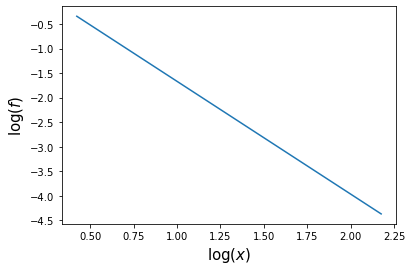

In [3]:
#Test power law in log scale.
mmin = 2.5
mmax = 150.0
plt.xlabel("$\log(x)$", fontsize=15)
plt.ylabel("$\log(f)$", fontsize=15)
x_arr = np.linspace(0.1 * mmin, 2.0 * mmax,1000) 
power_law = PowerLaw(x_arr, mmin, mmax, 2.3)
plt.plot(np.log10(x_arr), np.log10(power_law))

In [10]:
# Read file and assign variables
ICs_file = "output.txt"
masses = np.loadtxt(ICs_file, unpack=True, usecols=(0,5))
ecc = np.loadtxt(ICs_file, unpack=True, usecols=10)

In [11]:
# Check variable shapes
print(np.shape(masses))
print(np.shape(ecc))

(2, 100000)
(100000,)


#### To transform a pdf of the variable $x$, $f(x)$, to the pdf of the variable $y = \log(x)$, $g(y)$, we use

### $f(x)\vert dx \vert = g(y) \vert dy \vert\text{, then}$

### $g(y) = f(x) \left\vert \frac{dx}{dy} \right\vert = f(x){x\ln(10)}$

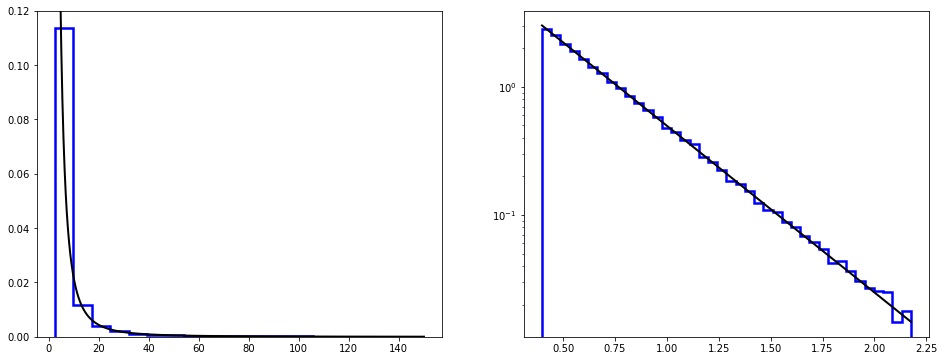

In [12]:
# Make histogram and compare data with theory.

figs, axs = plt.subplots(1, 2, figsize=(16, 6))

# Prepare arrays to plot
mmin = 2.5
mmax = 150.0
mass0_arr = np.linspace(mmin, mmax, 1000) # Array of masses from mmin to mmax, with 1000 points.
mass0 = masses[0]

##############################################################
# First plot: pdf of mass0 in linear scale.

axs[0].set_ylim(0,0.12)
# Plot target distribution
p = 2.3
axs[0].plot(mass0_arr, PowerLaw(mass0_arr, mmin, mmax, p), c='k', lw=2.0)

# Plot histogram of mass0
hist_linear = axs[0].hist(mass0, bins=20, density=True, histtype='step', color='blue', lw=2.5)
##############################################################

##############################################################
# Second plot: pdf of log10(mass0) in log scale.

# Set log scale for y axis
axs[1].set_yscale("log")
# Plot target distribution
p = 2.3
axs[1].plot(np.log10(mass0_arr), PowerLaw(mass0_arr, mmin, mmax, p) * mass0_arr * np.log(10.0), c='k', lw=2.0)
# Plot histogram of log10(mass0)
hist_loglog = axs[1].hist(np.log10(mass0), bins=40, density=True, histtype='step', color='blue', lw=2.5)
##############################################################